# Data preparation for calibration benchmarks

In [83]:
import os
os.getcwd()
import sys
sys.path.append('/Users/moralejo/CTA/ctasoft/cta-benchmarks/')

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from copy import deepcopy, copy
import os

from ctapipe.utils import get_dataset_path
from ctapipe.io import event_source
from ctapipe.calib import CameraCalibrator
from ctapipe.visualization import CameraDisplay
from ctapipe.io import HDF5TableWriter
from ctapipe.io.containers import Container, Field


In [85]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [86]:
from ctabench.dl1 import true_pe_cleaning, noise_calibrated_image, signal_calibrated_image

In [87]:
# infile = get_dataset_path('gamma_test_large.simtel.gz')
infile = '/Users/moralejo/Desktop/gamma_20deg_0deg_run100___cta-prod3-lapalma3-2147m-LaPalma_cone10.simtel.gz'
source = event_source(infile, max_events=None)

In [88]:
integrators = {0: 'NeighbourPeakIntegrator', 1: 'LocalPeakIntegrator', 2: 'FullIntegrator'}
cam_ids = {'LSTCam':0, 'NectarCam':1, 'FlashCam':2, 'SCTCam':3}

In [92]:
reco2true_ratio = []
reco = []
true = []

for ii, integrator in integrators.items():
    reco2true_ratio.append([])
    reco.append([])
    true.append([])
    for cam_id in cam_ids.items():
        reco2true_ratio[ii].append([])
        reco[ii].append([])
        true[ii].append([])
# i.e. list[integrator][camera][entry]


for ii, integrator in integrators.items():

    print(integrator)
    
    cal = CameraCalibrator(r1_product='HESSIOR1Calibrator',
                           extractor_product=integrator)

    for event in source:
        cal.calibrate(event)
        diff_sum = 0
        for tel_id in event.r0.tels_with_data:                
            
            cam_id = cam_ids[event.inst.subarray.tel[tel_id].camera.cam_id]
        
            true_image = event.mc.tel[tel_id].photo_electron_image
            true_image_nozeroes = true_image[true_image>0]
            
            calibrated_image = event.dl1.tel[tel_id].image[0]
            calibrated_image_nozeroes = calibrated_image[true_image>0]
            
            ratio = np.divide(calibrated_image_nozeroes,true_image_nozeroes)
            
            reco2true_ratio[ii][cam_id].extend(ratio.tolist())
            reco[ii][cam_id].extend(calibrated_image_nozeroes.tolist())
            true[ii][cam_id].extend(true_image_nozeroes.tolist())

                


NeighbourPeakIntegrator
LocalPeakIntegrator
FullIntegrator


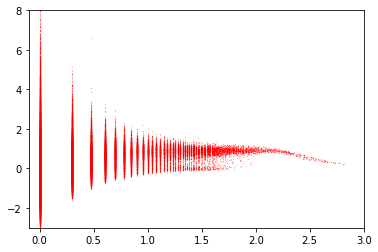

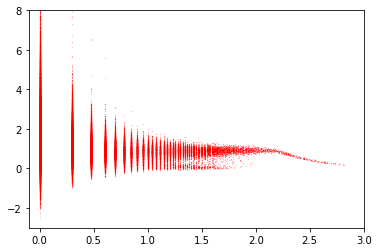

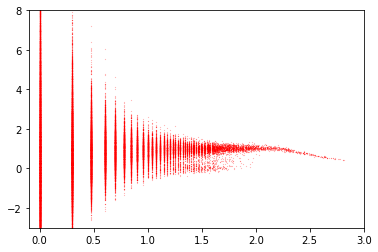

In [97]:
cam_id = 0
integrator_id = 1

for ii, integrator in integrators.items():
    ratio = np.array(reco2true_ratio[ii][cam_id])
    r = np.array(reco[ii][cam_id])
    t = np.array(true[ii][cam_id])

    _ = plt.plot(np.log10(t),r/t,'ro',markersize=0.1)
    plt.axis([-0.1, 3., -3., 8.])
    plt.show()